In [1]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#NLP tools
import string
import re
import nltk
from nltk.corpus import stopwords
from googletrans import Translator

#Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Sklearn data clean
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Logistic Regression
from sklearn.linear_model import Lasso, LogisticRegression

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz

# Random Forests 
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Gradient Boost
from xgboost import XGBClassifier

# Evaluate
from sklearn import metrics
from sklearn.metrics import log_loss,accuracy_score, f1_score,roc_auc_score, confusion_matrix, classification_report

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Datetime
from datetime import datetime

# Import data
import warnings

# Clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


In [2]:
tweets = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_tweets2')
users = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_users2')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               object
timestamp                object
crawled_at               object
updated                  object
class                    int64
dtypes: int64(12), object(6)
memory usage: 862.9+ MB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

### Convert time variables to datetime 
It doesn't appear that time variables such as timestamp or created_at were saved as datetime. We will convert them to their respective data type. 

In [5]:
# Convert the time columns to np.datetime object
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [6]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [7]:
tweets['crawled_at'] = pd.to_datetime(tweets['crawled_at'])

In [8]:
tweets['updated'] = pd.to_datetime(tweets['updated'])

In [9]:
# Convert the created_at column to np.datetime object
users['timestamp'] = pd.to_datetime(users['timestamp'])

In [10]:
users['created_at'] = pd.to_datetime(users['created_at'])

In [11]:
users['crawled_at'] = pd.to_datetime(users['crawled_at'])

In [12]:
users['updated'] = pd.to_datetime(users['updated'])

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               datetime64[ns, UTC]
timestamp                datetime64[ns]
crawled_at               datetime64[ns]
updated                  datetime64[ns]
class                    int64
dtypes: datetime64[ns, UTC](1), datetime64[ns](3), int64(12), object(2)
memory usage: 862.9+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

In [15]:
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,class
0,515447020405137408,"""Il mare d'inverno è un concetto che il pensie...","<a href=""http://www.Matildadr89.com"" rel=""nofo...",237359828,0,0,0,0,0,0,0,0,0,2014-09-26 10:25:20+00:00,2014-09-26 12:25:20,2014-11-13 01:35:24,2014-11-13 01:35:24,1
1,513551196226093057,Read the History of Corona Beer http://t.co/Z...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",215693377,0,0,0,0,0,0,0,1,0,2014-09-21 04:52:01+00:00,2014-09-21 06:52:01,2014-11-12 23:35:05,2014-11-12 23:35:05,1
2,579534763872149504,After that it would of been up to the person i...,"<a href=""http://twitter.com/download/iphone"" r...",164284493,0,0,0,0,0,0,0,0,0,2015-03-22 06:47:09+00:00,2015-03-22 07:47:09,2015-05-01 13:21:46,2015-05-01 13:21:46,0
3,449751137970028544,RT @kcivey: @marionbarryjr I'm for public fina...,"<a href=""http://twitter.com/download/iphone"" r...",225683965,0,0,449735142085779456,1,0,0,0,0,2,2014-03-29 03:33:21+00:00,2014-03-29 04:33:21,2015-05-01 15:58:20,2015-05-01 15:58:20,0
4,589197488269045760,RT @specuIar: This hit me hard. http://t.co/rY...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",505440359,0,0,589196377353097216,1300,0,0,0,0,1,2015-04-17 22:43:22+00:00,2015-04-18 00:43:22,2015-05-01 13:21:33,2015-05-01 13:21:33,0


In [16]:
users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,profile_image_url,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,created_at,timestamp,crawled_at,updated,class
0,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-02-18 11:22:38+00:00,2014-02-18 12:22:38,2014-05-03 00:22:39,2016-03-15 15:20:24,1
1,343263643,RIP Teveon ,youpettihoe_,36513,2166,1627,2977,0,en,http://pbs.twimg.com/profile_images/5594447898...,...,FFFFFF,FFFFFF,http://pbs.twimg.com/profile_background_images...,FFFAFF,0A7A00,2011-07-27 09:01:04+00:00,2011-07-27 11:01:04,2015-05-01 23:18:23,2016-03-15 16:11:13,0
2,531154412,Bulah Lynne,Lynnevibe,10657,1194,996,1,8,en,http://pbs.twimg.com/profile_images/1914097815...,...,C0DEED,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,2012-03-20 11:48:05+00:00,2012-03-20 12:48:05,2014-05-05 23:24:32,2016-03-15 15:40:08,1
3,2377665366,Katherina Kistle,KatherinaKistle,37,0,38,0,0,en,http://pbs.twimg.com/profile_images/4430041788...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-03-07 21:23:35+00:00,2014-03-07 22:23:35,2014-05-05 00:21:50,2016-03-15 15:16:15,1
4,3015346510,Lindsay Blessing Fan,lindsayspainfan,96,43,113,425,0,es,http://pbs.twimg.com/profile_images/5631073115...,...,000000,000000,http://pbs.twimg.com/profile_background_images...,000000,9266CC,2015-02-03 20:49:38+00:00,2015-02-03 21:49:38,2015-05-02 01:09:46,2016-03-15 16:07:16,0


### Examine 'user_id' in Tweets table
In an attempt to 'clean' the data, I tried to remove user accounts that did not have an associated tweet. If an _id_ in the Users table was not present in the _user_id_ column of the Tweets table, that account should be removed in the Users table. However, there doesn't appear to be common user ids between the two tables. This might have been done to protect the privacy of the account users. 

Before we continue, let's confirm whether user ids in the Tweets table are unique to each account. 


In [17]:
# Create df for user class
bots = tweets.loc[tweets['class']==1]
gen = tweets.loc[tweets['class']==0]

In [18]:
bots.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,class
0,515447020405137408,"""Il mare d'inverno è un concetto che il pensie...","<a href=""http://www.Matildadr89.com"" rel=""nofo...",237359828,0,0,0,0,0,0,0,0,0,2014-09-26 10:25:20+00:00,2014-09-26 12:25:20,2014-11-13 01:35:24,2014-11-13 01:35:24,1
1,513551196226093057,Read the History of Corona Beer http://t.co/Z...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",215693377,0,0,0,0,0,0,0,1,0,2014-09-21 04:52:01+00:00,2014-09-21 06:52:01,2014-11-12 23:35:05,2014-11-12 23:35:05,1
5,529731955978670081,The years are adding up when it takes us longe...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",531157328,0,0,0,0,0,0,0,0,0,2014-11-04 20:28:34+00:00,2014-11-04 21:28:34,2014-11-13 04:37:25,2014-11-13 04:37:25,1
6,527966234101702657,The difference between gossip and news is whet...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",241300883,0,0,0,0,0,0,0,0,0,2014-10-30 23:32:14+00:00,2014-10-31 00:32:14,2014-11-13 00:06:24,2014-11-13 00:06:24,1
7,510797657212977152,You don't save a pitcher for tomorrow. Tomorro...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",195006541,0,0,0,0,0,0,0,0,0,2014-09-13 14:30:26+00:00,2014-09-13 16:30:26,2014-11-12 23:09:01,2014-11-12 23:09:01,1


In [19]:
# Number of unique user accounts
len(bots['user_id'].unique().tolist())

4912

In [20]:
# Counts of unique user accounts 
bots['user_id'].value_counts()

521370115     3258
334826952     3250
221141363     3250
239910996     3250
982414274     3250
              ... 
2382422750      66
2375328500      64
2382743514      63
2391867347      43
2384976224      38
Name: user_id, Length: 4912, dtype: int64

To confirm that these user ids are unique to the bots account, we will select a few user ids to verify that they only belong to the specific user in the Tweets table. 

Let's start by verifying _user_id_: 521370115

In [21]:
# Create df with selected user id 
user_id = tweets[tweets['user_id']==521370115]
user_id.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,class
1351,514086444387008513,Read the History of Journey http://t.co/DGLvo...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",521370115,0,0,0,0,0,0,0,1,0,2014-09-22 16:18:54+00:00,2014-09-22 18:18:54,2014-11-13 03:10:13,2014-11-13 03:10:13,1
5270,518798551498096640,"If it weren't for baseball, many kids wouldn't...","<a href=""http://tweetadder.com"" rel=""nofollow""...",521370115,0,0,0,0,0,0,0,0,0,2014-10-05 16:23:08+00:00,2014-10-05 18:23:08,2014-11-13 03:10:11,2014-11-13 03:10:11,1
5817,521430185942724609,Before you create anymore great content figure...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",521370115,0,0,0,0,0,0,0,0,0,2014-10-12 22:40:18+00:00,2014-10-13 00:40:18,2014-11-13 03:10:08,2014-11-13 03:10:09,1
6142,513408584437096448,Running SUCKS! How to Run for Fast Weight Loss...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",521370115,0,0,0,0,0,0,0,1,0,2014-09-20 19:25:19+00:00,2014-09-20 21:25:19,2014-11-13 03:10:13,2014-11-13 03:10:13,1
8566,517016238703509505,Check Out these Cool Types of Garage Flooring ...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",521370115,0,0,0,0,0,0,0,1,0,2014-09-30 18:20:51+00:00,2014-09-30 20:20:51,2014-11-13 03:10:12,2014-11-13 03:10:12,1


Now, let's check if this user id is associated with a human class (0).

In [22]:
# Count of class 
user_id['class'].value_counts()

1    3258
Name: class, dtype: int64

In [23]:
# Verify another user id 
user_id2 = tweets[tweets['user_id']==2384976224]

# Count of class 
user_id2['class'].value_counts()

1    38
Name: class, dtype: int64

It does look like that the user ids are unique to specific accounts. Let's verify some genuine accounts before we move on. 

In [24]:
# Number of unique user accounts
len(gen['user_id'].unique().tolist())

1083

In [25]:
# Counts of unique user accounts 
gen['user_id'].value_counts()

15044720      3250
497404180     3249
182211050     3247
195076965     3247
14626600      3247
              ... 
492728332       24
2236789484      15
2200425967      14
24386710        13
514061230        3
Name: user_id, Length: 1083, dtype: int64

In [26]:
# Create df with selected user id 
user_id3 = tweets[tweets['user_id']==15044720]

# Count of class 
user_id3['class'].value_counts()

0    3250
Name: class, dtype: int64

In [27]:
# Verify another user id 
user_id4 = tweets[tweets['user_id']==514061230]

# Count of class 
user_id4['class'].value_counts()

0    3
Name: class, dtype: int64

## Exploratory Data Analysis
We'll start by exploring the Tweets table by keeping a few questions in mind.<br> 
__How many tweets were made by humans and robots?__ <br>
__Which accounts posted the most tweets?__ <br>

In [28]:
# Bot vs human tweets 
counts = tweets['class'].value_counts()
human = counts[0]
bot = counts[1]
human_per = (human/(human + bot))*100
bot_per = (bot/(human + bot))*100
print('There are {} tweets made by humans({:.3f}%) and {} tweets made by bots ({:.3f}%) in the tweets table.'.format(human, human_per, bot, bot_per))

There are 2826718 tweets made by humans(44.987%) and 3456718 tweets made by bots (55.013%) in the tweets table.


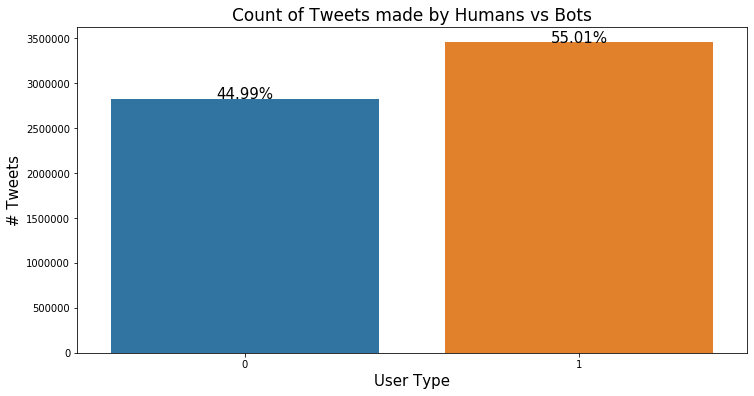

In [29]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = tweets)
g.set_title('Count of Tweets made by Humans vs Bots', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Tweets', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(tweets) * 100),
            ha="center", fontsize=15) 

As shown in the bar graph, the data consists of 45% tweets by humans and 55% tweets by robots. The ratio between human to robot tweets are close so we do not have an imbalance problem. 

Let's look at which accounts tweeted the most. 

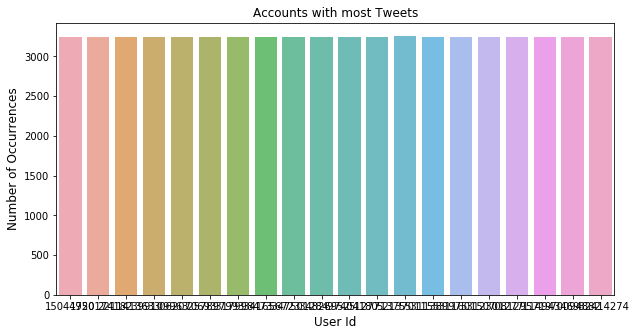

In [30]:
t_per_user = tweets['user_id'].value_counts()
t_per_user = t_per_user[:20,]
plt.figure(figsize=(10,5))
sns.barplot(t_per_user.index, t_per_user.values, alpha=0.8)
plt.title('Accounts with most Tweets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('User Id', fontsize=12)
plt.show()

In [31]:
# Bot vs human tweets 
counts = users['class'].value_counts()
human = counts[0]
bot = counts[1]
human_per = (human/(human + bot))*100
bot_per = (bot/(human + bot))*100
print('There are {} genuine accounts({:.3f}%) and {} spambot accounts ({:.3f}%) in the users table.'.format(human, human_per, bot, bot_per))

There are 3083 genuine accounts(38.591%) and 4906 spambot accounts (61.409%) in the users table.


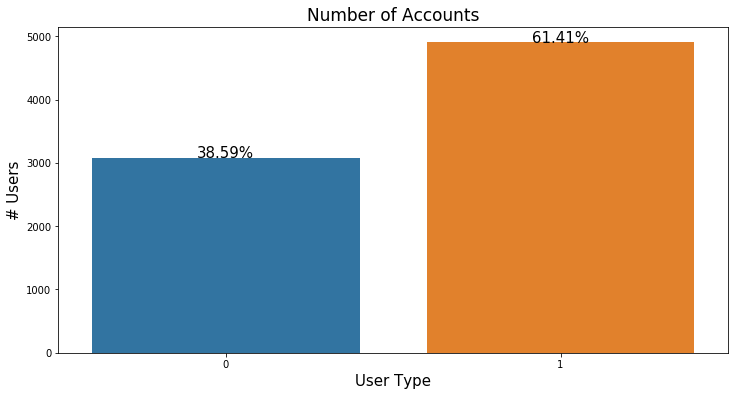

In [32]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = users)
g.set_title('Number of Accounts', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Users', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(users) * 100),
            ha="center", fontsize=15) 

In [33]:
# tweets per day

In [34]:
# tweet over time 

In [35]:
# pauses between tweets

In [36]:
# creation time

In [37]:
#def hr_func(ts):
    #return ts.hour

In [38]:
#df['hour_tweet'] = users['timestamp'].apply(hr_func)

In [39]:
# number of retweets / total posts

In [40]:
# ratio of numbers in screen_name

## Clean Tweets
We will clean the tweets with the following steps:
 * Translate Italian tweets to English [Source](https://pypi.org/project/googletrans/)
 * Remove hyperlinks, mentions, and 'RT' from retweets
 * CounterVectorization to create Bag of Words by: 
     - Tokenization: Converting a sentence into a list of words
     - Remove stopwords
     - Lammentization/stemming: Converting any form of a word ot its root word
     - Returns vectors of the counts of each word
 
 Reference:
 [clean tweet](https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis)
 [Source](https://datascienceplus.com/twitter-analysis-with-python/)
 
First, we will paritation the clean_tweets into separate classes for building bag of words and cut down on processing time for CountVectorizer and TfidTransformer. 
 
Let's start by cleaning the bot tweets. 
 

In [85]:
tweets['text'] = tweets['text'].astype('str')

In [86]:
# Create df for user class
bots = tweets.loc[tweets['class']==1]
gen = tweets.loc[tweets['class']==0]

In [87]:
# Create new df 
b_tweets = pd.DataFrame(bots['text'])
b_tweets.head()

,text
0,"""Il mare d'inverno è un concetto che il pensie..."
1,Read the History of Corona Beer http://t.co/Z...
5,The years are adding up when it takes us longe...
6,The difference between gossip and news is whet...
7,You don't save a pitcher for tomorrow. Tomorro...


In [88]:
# Create new df  
g_tweets = pd.DataFrame(gen['text'])
g_tweets.head()

,text
2,After that it would of been up to the person i...
3,RT @kcivey: @marionbarryjr I'm for public fina...
4,RT @specuIar: This hit me hard. http://t.co/rY...
9,RT @AngStupidyante: Knock knock?Husder?DOTA 2C...
11,@65_wat I wouldn’t even have the laptop open


Let's clean the tweets to remove links, @, and RT.

In [89]:
def text_cleaner(text):
    text = re.sub(r'http.*','',text)
    text = re.sub("@[A-Za-z0-9]+",'',text)
    text = re.sub(r'bit/ly.*', '', text)
    text = re.sub(r'b\'', '', text)
    text = re.sub(r'b"', '', text)
    text = text.replace('RT', '')
    return text

b_tweets['clean_tweets'] = b_tweets['text'].apply(lambda x: text_cleaner(x))

b_tweets.head()

,text,clean_tweets
0,"""Il mare d'inverno è un concetto che il pensie...","""Il mare d'inverno è un concetto che il pensie..."
1,Read the History of Corona Beer http://t.co/Z...,Read the History of Corona Beer
5,The years are adding up when it takes us longe...,The years are adding up when it takes us longe...
6,The difference between gossip and news is whet...,The difference between gossip and news is whet...
7,You don't save a pitcher for tomorrow. Tomorro...,You don't save a pitcher for tomorrow. Tomorro...


In [90]:
g_tweets['clean_tweets'] = g_tweets['text'].apply(lambda x: text_cleaner(x))

g_tweets.head()

,text,clean_tweets
2,After that it would of been up to the person i...,After that it would of been up to the person i...
3,RT @kcivey: @marionbarryjr I'm for public fina...,": I'm for public finance, but for now why sh..."
4,RT @specuIar: This hit me hard. http://t.co/rY...,: This hit me hard.
9,RT @AngStupidyante: Knock knock?Husder?DOTA 2C...,: Knock knock?Husder?DOTA 2Can I have your DO...
11,@65_wat I wouldn’t even have the laptop open,_wat I wouldn’t even have the laptop open


In [91]:
# Return only characters 
def clean_alpha(text):
    text = " ".join(re.split("[^a-zA-Z]*", text))
    return text

b_tweets['clean_tweets'] = b_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

b_tweets.head()

,text,clean_tweets
0,"""Il mare d'inverno è un concetto che il pensie...",il mare d inverno un concetto che il pensiero...
1,Read the History of Corona Beer http://t.co/Z...,read the history of corona beer
5,The years are adding up when it takes us longe...,the years are adding up when it takes us longe...
6,The difference between gossip and news is whet...,the difference between gossip and news is whet...
7,You don't save a pitcher for tomorrow. Tomorro...,you don t save a pitcher for tomorrow tomorrow...


In [92]:
g_tweets['clean_tweets'] = g_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

g_tweets.head()

,text,clean_tweets
2,After that it would of been up to the person i...,after that it would of been up to the person i...
3,RT @kcivey: @marionbarryjr I'm for public fina...,i m for public finance but for now why should...
4,RT @specuIar: This hit me hard. http://t.co/rY...,this hit me hard
9,RT @AngStupidyante: Knock knock?Husder?DOTA 2C...,knock knock husder dota can i have your dota ...
11,@65_wat I wouldn’t even have the laptop open,wat i wouldn t even have the laptop open


In [93]:
# Tokenization 
def tokenization(text):
   text = re.split('\W', text)
   return text

b_tweets['clean_tweets'] = b_tweets['clean_tweets'].apply(lambda x: tokenization(x.lower()))

b_tweets.head()

,text,clean_tweets
0,"""Il mare d'inverno è un concetto che il pensie...","[, il, mare, d, inverno, un, concetto, che, il..."
1,Read the History of Corona Beer http://t.co/Z...,"[read, the, history, of, corona, beer, ]"
5,The years are adding up when it takes us longe...,"[the, years, are, adding, up, when, it, takes,..."
6,The difference between gossip and news is whet...,"[the, difference, between, gossip, and, news, ..."
7,You don't save a pitcher for tomorrow. Tomorro...,"[you, don, t, save, a, pitcher, for, tomorrow,..."


In [94]:
g_tweets['clean_tweets'] = g_tweets['clean_tweets'].apply(lambda x: tokenization(x.lower()))

g_tweets.head()

,text,clean_tweets
2,After that it would of been up to the person i...,"[after, that, it, would, of, been, up, to, the..."
3,RT @kcivey: @marionbarryjr I'm for public fina...,"[, i, m, for, public, finance, but, for, now, ..."
4,RT @specuIar: This hit me hard. http://t.co/rY...,"[, this, hit, me, hard, ]"
9,RT @AngStupidyante: Knock knock?Husder?DOTA 2C...,"[, knock, knock, husder, dota, can, i, have, y..."
11,@65_wat I wouldn’t even have the laptop open,"[, wat, i, wouldn, t, even, have, the, laptop,..."


In [95]:
b_clean = b_tweets['clean_tweets']
g_clean = g_tweets['clean_tweets']

In [65]:
# Convert df to np arrary 
#b_tweets = b_tweets['clean_tweets'].values

In [66]:
# Convert np arrary to one deminsional array 
#b_tweets = b_tweets.ravel()

In [70]:
#type(b_tweets)

numpy.ndarray

In [67]:
# Convert df to np arrary 
#g_tweets = g_tweets['clean_tweets'].values

In [68]:
# Convert np arrary to one deminsional array 
#g_tweets = g_tweets.ravel()

In [71]:
#type(g_tweets)

numpy.ndarray

In [96]:
# Text preprocessing, tokenizing and filtering of stopwords are all included 
# in CountVectorizer, which builds a dictionary of features and transforms 
# documents to feature vectors

# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(b_clean)

# encode document
b_clean = vectorizer.transform(b_clean)

# summarize encoded vector
print(b_clean.shape)
print(type(b_clean))
print(b_clean.toarray())

#vectorizer = CountVectorizer()
#b_tweets = vectorizer.fit_transform()

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
tf_transformer = TfidfTransformer(use_idf=False).fit(b_clean)
b_tfidf_train = tf_transformer.transform(b_clean)
b_tfidf_train.shape

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(g_clean)

# encode document
g_clean = vectorizer.transform(g_clean)

# summarize encoded vector
print(g_clean.shape)
print(type(g_clean))
print(g_clean.toarray())


#vectorizer = CountVectorizer()
#g_tweets = vectorizer.fit_transform(g_clean)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=False).fit(g_clean)
g_tfidf_train = tf_transformer.transform(g_clean)
g_tfidf_train.shape

In [ ]:
# TruncatedSVD from Scikit-Learn
from sklearn.decomposition import TruncatedSVD
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
b_svdTFit = svd.fit_transform(b_tfidf_train)
b_svdTFit.shape

In [ ]:
bots.shape

In [ ]:
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
g_svdTFit = svd.fit_transform(g_tfidf_train)
g_svdTFit.shape 

In [ ]:
gen.shape

In [ ]:
# Join Tfid with class df 
bots_tfid = pd.concat([bots, b_svdTFit], axis =1)
bots_tfid.head()

In [ ]:
# Join Tfid with class df 
gen_tfid = pd.concat([gen, g_svdTFit], axis =1)
gen_tfid.head()